<!-- # Compare Temperature Across Locations

Minimum and Maximum Temperature Comparison
* TMAX: The maximum temperature on a day
* TMIN: The minimum temperature on a day
* TAVG: (If available) The average temperature on a day

Mininum Temperature for Gardeners
* [USDA Plant Hardiness Zones](#usda_hardiness_zones)

The Ideal Temperature (Location)
* Based on TMAX -->

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import functions

In [ ]:
# # Station 1 - Clatskanie
# df = pd.read_csv('../data/temperature_97016.csv')
# df = df[df['STATION']=='USC00351643']
# df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
# df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
# df1 = df[df['year']<2025]

# # Verify station 
# # functions.view_station_date_ranges(df)
# # geo_data = pd.read_csv('../data/geo_data.csv')
# # functions.map_stations(geo_data)

# assert len(df['STATION'].unique()) == 1

In [2]:
# Station 1 - Chicago
df = pd.read_csv('../data/temperature_chicago_ord.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df1 = df[df['year']<2025]
assert len(df['STATION'].unique()) == 1

In [3]:
# Station 2 - Portland
df = pd.read_csv('../data/temperature_97218.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df = df[df['year']<2025]
assert len(df['STATION'].unique()) == 1

df2 = df.copy()

In [4]:
# Merge the stations into one df
# df1_suffix = '_CLATSKANIE'
df1_suffix = '_ORD'
df2_suffix = '_PDX'
df = df1.merge(df2,
                on=['DATE', 'year'],
                how='inner',
                suffixes=(df1_suffix, df2_suffix)
)

In [5]:
# df.describe()
df

,STATION_ORD,NAME_ORD,DATE,TAVG_ORD,TMAX_ORD,TMIN_ORD,year,month_ORD,STATION_PDX,NAME_PDX,TAVG_PDX,TMAX_PDX,TMIN_PDX,month_PDX
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1960-01-01,NaN,35,27,1960,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,31,22,1
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1960-01-02,NaN,43,31,1960,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,37,25,1
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1960-01-03,NaN,31,13,1960,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,36,25,1
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1960-01-04,NaN,21,8,1960,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,37,25,1
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1960-01-05,NaN,20,9,1960,1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",NaN,40,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23737,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2024-12-27,47.0,52,45,2024,12,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",49.0,53,45,12
23738,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2024-12-28,50.0,51,42,2024,12,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",51.0,55,48,12
23739,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2024-12-29,44.0,46,36,2024,12,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",49.0,52,43,12
23740,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2024-12-30,37.0,42,32,2024,12,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.0,50,41,12


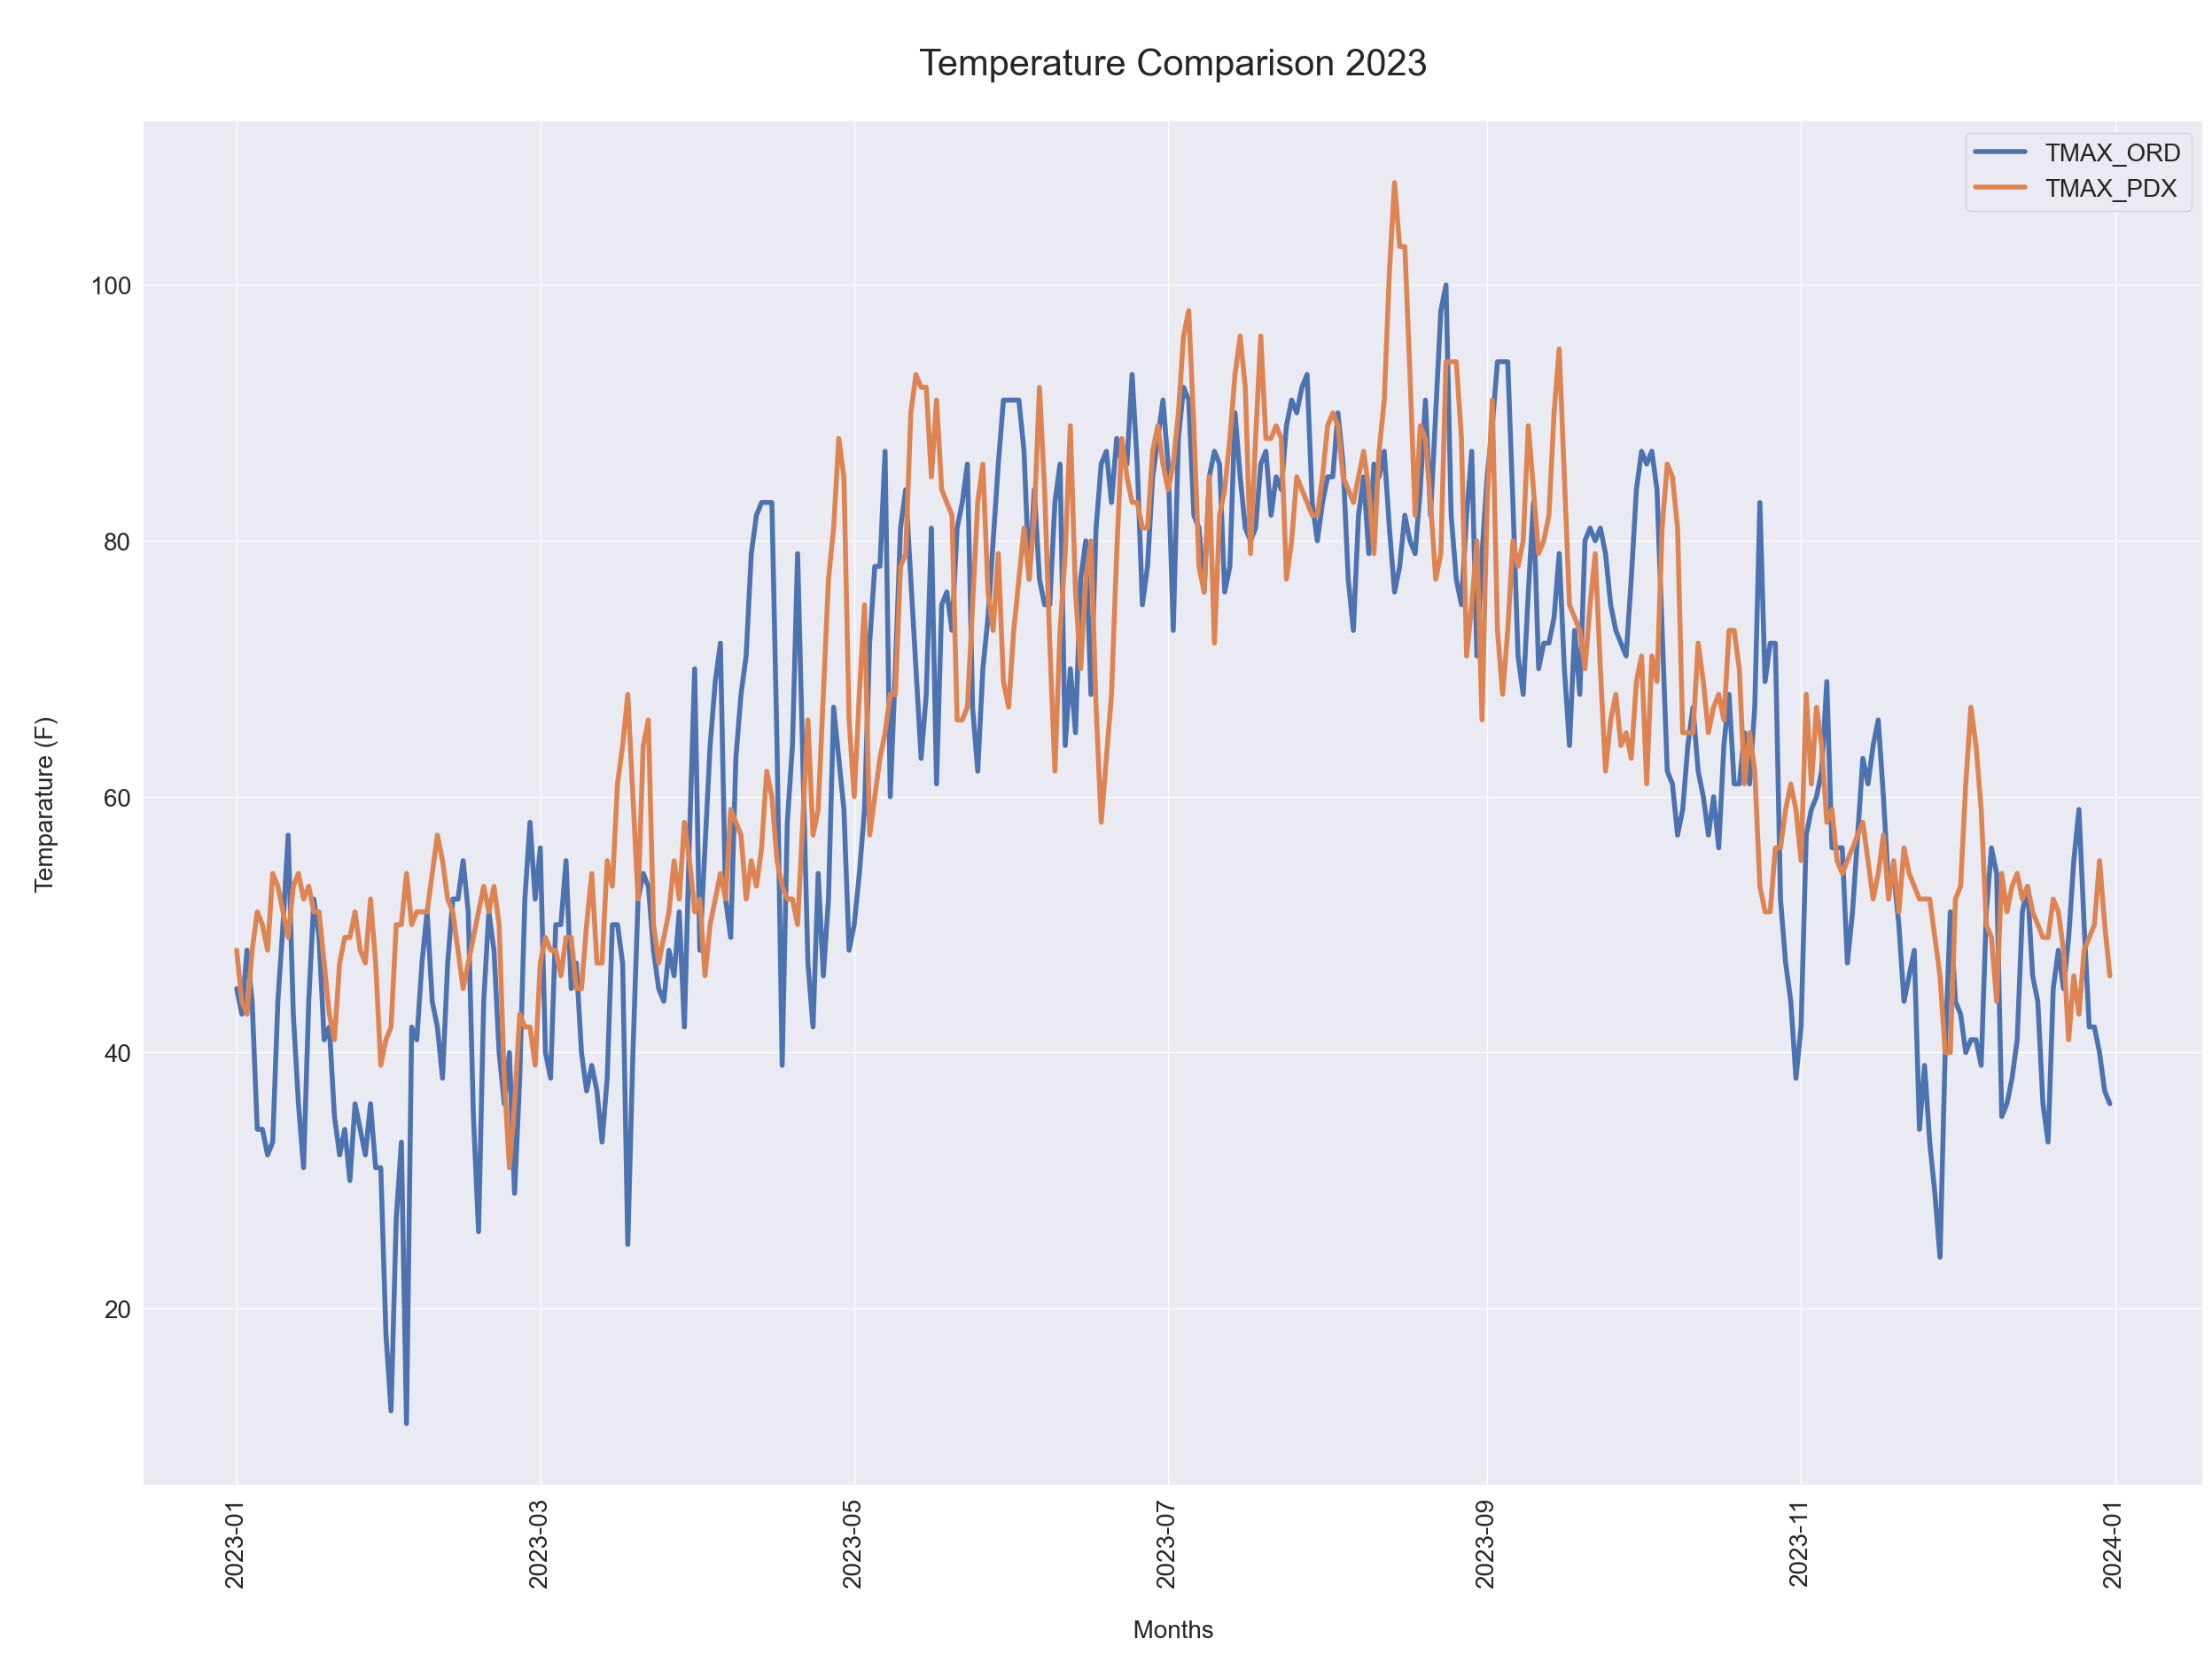

In [7]:
# Plot maximum temperature
pmax = functions.plot_temp_compare(df, 'TMAX', 2023)
# pmax.savefig('tmax_compare.jpg') 

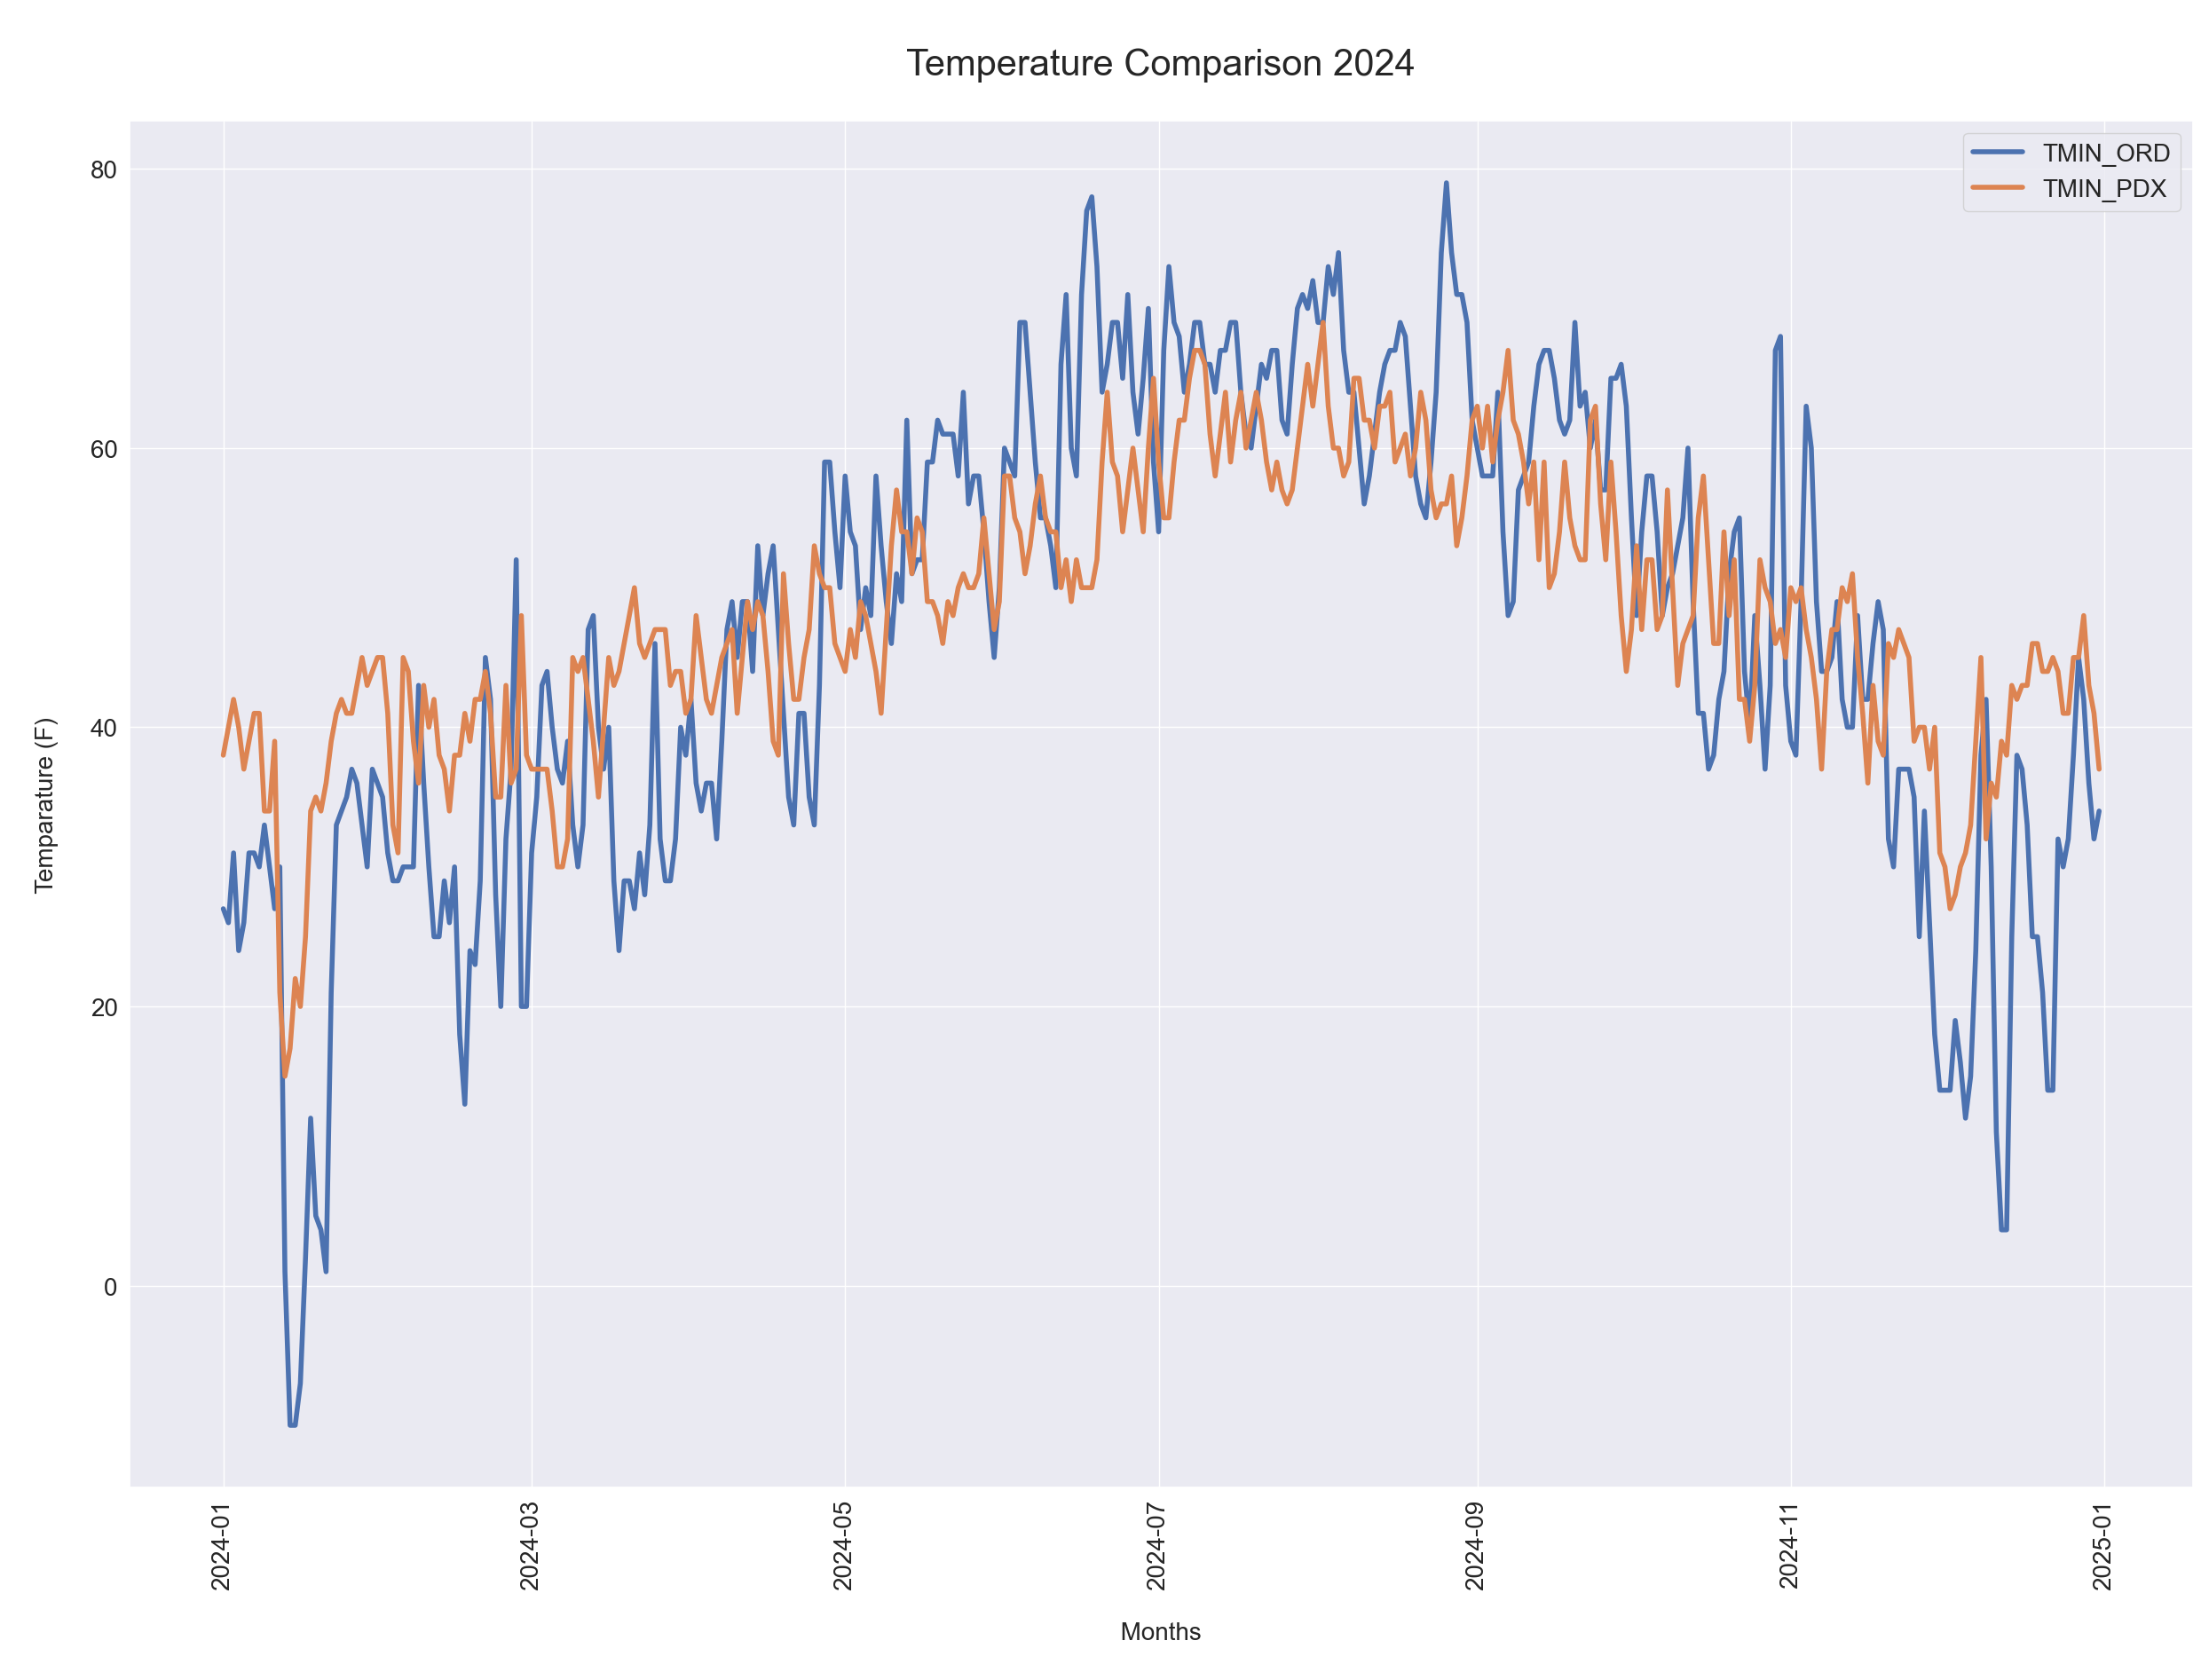

In [8]:
# Plot minimum temperature
pmin = functions.plot_temp_compare(df, 'TMIN', 2024)
# pmin.savefig('tmin_compare.jpg') 

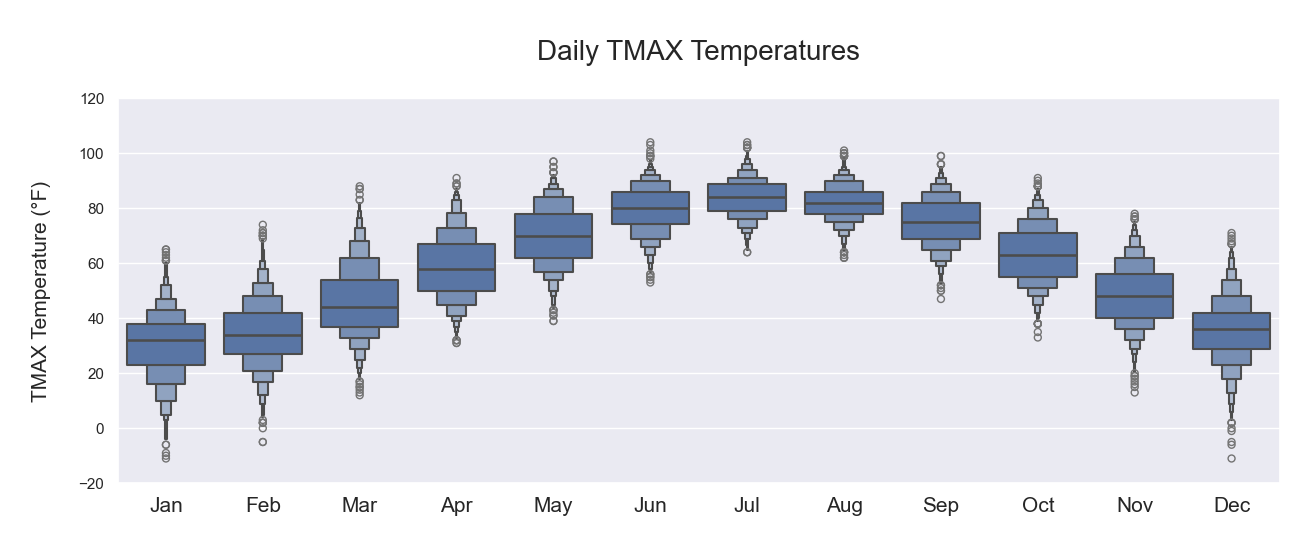

In [9]:
functions.plot_monthly_temp_plots(df1, metric='TMAX', ylim_low=-20, ylim_high=120)

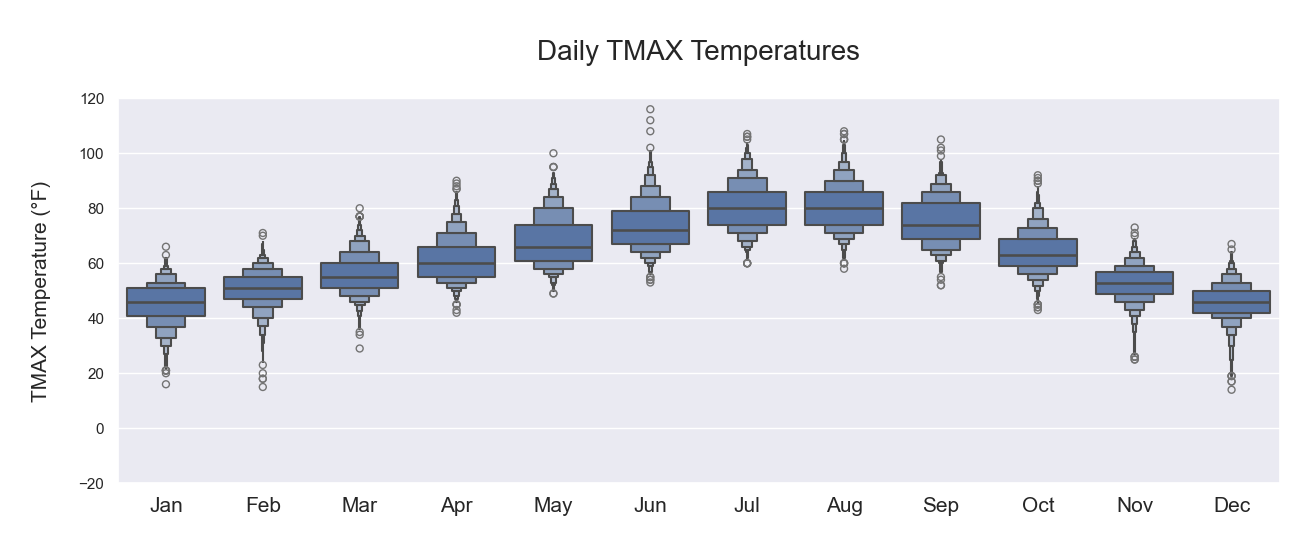

In [10]:
functions.plot_monthly_temp_plots(df2, metric='TMAX', ylim_low=-20, ylim_high=120)

<!-- <a id="usda_hardiness_zones"></a>

## USDA Plant Hardiness Zones
* A USDA hardiness zone is defined by the minimum annual temperature at a station, averaged over the last 30 years
* For example, by this metric
    * USDA Zone 8a falls within 10°F and 15°F
    * USDA Zone 8b falls within 15°F and 20°F
    * USDA Zone 9a falls within 20°F and 25°F -->

In [ ]:
TODO move the following into functions

In [11]:
# THIS SHOULD BE A FUNCTION 
# Get Daily Minimum Temperature data
df = pd.read_csv('../data/temperature_97016.csv')
df = df.assign(year = pd.to_datetime(df['DATE']).dt.year)
df = df.assign(month = pd.to_datetime(df['DATE']).dt.month)
df1 = df[df['STATION']=='USC00351643']
df2 = pd.read_csv('../data/temperature_chicago_ord.csv')
# df2 = pd.read_csv('../data/temperature_97218.csv')
df2 = df2.assign(year = pd.to_datetime(df2['DATE']).dt.year)
df2 = df2.assign(month = pd.to_datetime(df2['DATE']).dt.month)

# Verify that there is only one station per df
assert len(df1.STATION.unique()) == 1
assert len(df2.STATION.unique()) == 1

# Merge the stations into one df
df1_suffix = '_CLATSKANIE'
df2_suffix = '_ORD' # '_PDX'
df = df1.merge(df2,
          on=['DATE', 'year'],
          how='inner',
          suffixes=(df1_suffix, df2_suffix)
          ).drop(['STATION' + df1_suffix, 'STATION' + df2_suffix], axis=1)

In [12]:
len(df.year.unique())

65

In [20]:
# Get weather station location data 
df_stations = pd.read_csv('../data/geo_data.csv')
df_stations = df_stations[df_stations['STATION'].isin(list(set(df1['STATION'].unique()).union(df2['STATION'].unique())))]

# Map the stations 
# US
functions.map_stations(df_stations,
                       default_lat=40,
                       default_long=-95,
                       default_zoom=4,)

# # Oregon
# functions.map_stations(df_stations,
#                        default_lat=45.7,
#                        default_long=-122.7,
#                        default_zoom=9,)

In [21]:
# View the minimium temperature for each year
tmin = df.groupby('year', as_index=False).agg({'TMIN' + df1_suffix: 'min', 'TMIN' + df2_suffix: 'min'})

# Check for null values
print('null values', tmin.isnull().sum().sum())

tmin

null values 0


,year,TMIN_CLATSKANIE,TMIN_ORD
0,1960,21.0,-17
1,1961,22.0,-8
2,1962,11.0,-15
3,1963,11.0,-19
4,1964,10.0,-13
...,...,...,...
60,2020,24.0,-2
61,2021,21.0,-7
62,2022,20.0,-8
63,2023,16.0,-1


In [22]:
# Calculate the USDA hardiness zone for each station and year

# Use dynamic column names from tmin.columns
col1 = tmin.columns[1]
col2 = tmin.columns[2]

tmin[f"{col2.replace('TMIN_', '').replace('_', ' ')} Hardiness Zone"] = tmin[col2].rolling(window=30, min_periods=30).mean()
tmin[f"{col1.replace('TMIN_', '').replace('_', ' ')} Hardiness Zone"] = tmin[col1].rolling(window=30, min_periods=30).mean()
tmin

,year,TMIN_CLATSKANIE,TMIN_ORD,ORD Hardiness Zone,CLATSKANIE Hardiness Zone
0,1960,21.0,-17,NaN,NaN
1,1961,22.0,-8,NaN,NaN
2,1962,11.0,-15,NaN,NaN
3,1963,11.0,-19,NaN,NaN
4,1964,10.0,-13,NaN,NaN
...,...,...,...,...,...
60,2020,24.0,-2,-8.466667,16.666667
61,2021,21.0,-7,-8.600000,16.766667
62,2022,20.0,-8,-8.466667,16.733333
63,2023,16.0,-1,-8.333333,16.866667


In [23]:
# Make the wide format long, for the seaborn lineplot
tmin_long = tmin.melt(id_vars='year', value_vars=[tmin.columns[1], tmin.columns[2]],
                      var_name='station', value_name='tmin')
tmin_long

,year,station,tmin
0,1960,TMIN_CLATSKANIE,21.0
1,1961,TMIN_CLATSKANIE,22.0
2,1962,TMIN_CLATSKANIE,11.0
3,1963,TMIN_CLATSKANIE,11.0
4,1964,TMIN_CLATSKANIE,10.0
...,...,...,...
125,2020,TMIN_ORD,-2.0
126,2021,TMIN_ORD,-7.0
127,2022,TMIN_ORD,-8.0
128,2023,TMIN_ORD,-1.0


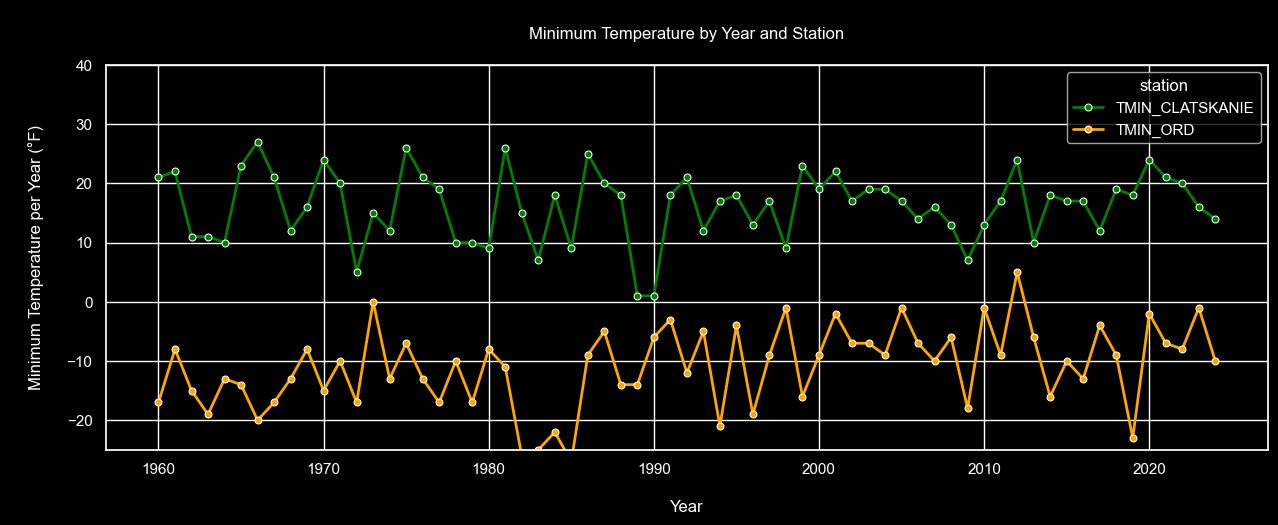

In [24]:
# sns.set_theme(style="darkgrid")
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
p = sns.lineplot(data=tmin_long,
             x='year',
             y='tmin',
             hue='station',
             palette=['green', 'orange'],
             marker='o',    
             markersize=5,
             linewidth=2,
             style='station',
             dashes=False,
            #  legend='full',
                )

# add a title to the plot
plt.title('\nMinimum Temperature by Year and Station\n')
plt.ylim(-25, 40)
p.set_xlabel("\nYear", fontsize=12, rotation=0)
p.set_ylabel("\nMinimum Temperature per Year (°F)\n", fontsize=12, rotation=90)

# Suppress printouts
plt.show()


In [25]:
# How has the USDA hardiness zone changed year-by-year?
# This makes for better storytelling

# Make the wide format long, for the seaborn lineplot
usdahz = tmin.melt(id_vars='year', value_vars=[tmin.columns[3], tmin.columns[4]],
                      var_name='station', value_name='USDA Hardiness Zone').dropna()
usdahz

,year,station,USDA Hardiness Zone
29,1989,ORD Hardiness Zone,-14.133333
30,1990,ORD Hardiness Zone,-13.766667
31,1991,ORD Hardiness Zone,-13.600000
32,1992,ORD Hardiness Zone,-13.500000
33,1993,ORD Hardiness Zone,-13.033333
...,...,...,...
125,2020,CLATSKANIE Hardiness Zone,16.666667
126,2021,CLATSKANIE Hardiness Zone,16.766667
127,2022,CLATSKANIE Hardiness Zone,16.733333
128,2023,CLATSKANIE Hardiness Zone,16.866667


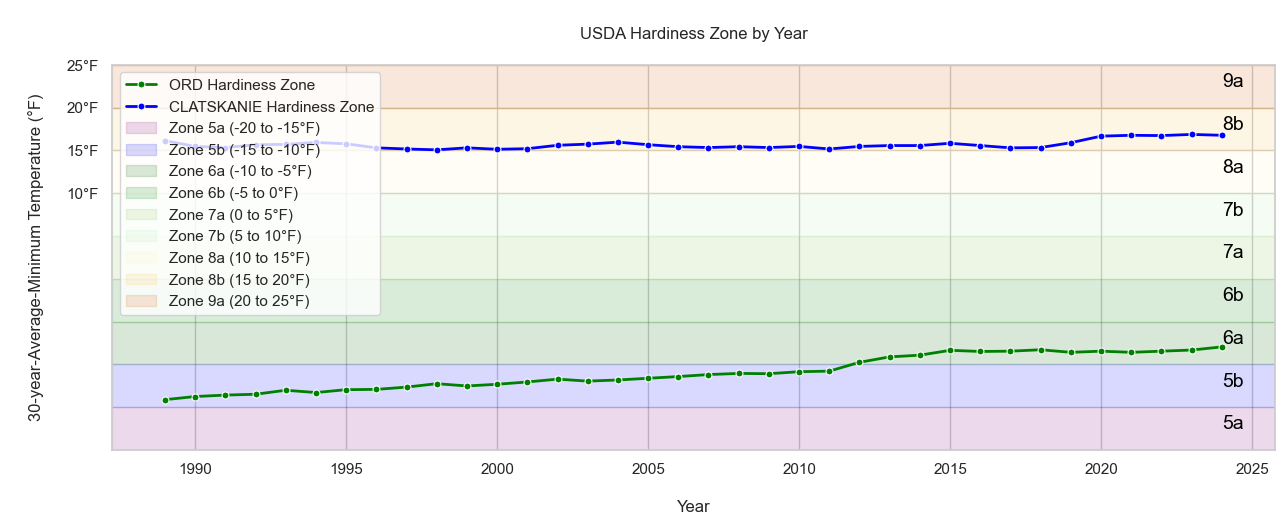

In [26]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,5))
p = sns.lineplot(data=usdahz,
             x='year',
             y='USDA Hardiness Zone',
             hue='station',
             palette=['green', 'blue'],
             marker='o',    
             markersize=5,
             linewidth=2,
             style='station',
             dashes=False,
                )

# Superimpose colored bands for USDA zones
# https://colorbrewer2.org/#type=sequential&scheme=YlOrBr&n=3
p.axhspan(-20, -15, color='purple', alpha=0.15, label='Zone 5a (-20 to -15°F)')
p.axhspan(-15, -10, color='blue', alpha=0.15, label='Zone 5b (-15 to -10°F)')
p.axhspan(-10, -5, color='#006400', alpha=0.15, label='Zone 6a (-10 to -5°F)')
p.axhspan(-5, 0, color='green', alpha=0.15, label='Zone 6b (-5 to 0°F)')
p.axhspan(0, 5, color='#8bc34a', alpha=0.15, label='Zone 7a (0 to 5°F)')
p.axhspan(5, 10, color='#b7efb2', alpha=0.15, label='Zone 7b (5 to 10°F)')
p.axhspan(10, 15, color='#fff7bc', alpha=0.15, label='Zone 8a (10 to 15°F)')
p.axhspan(15, 20, color='#fec44f', alpha=0.15, label='Zone 8b (15 to 20°F)')
p.axhspan(20, 25, color='#d95f0e', alpha=0.15, label='Zone 9a (20 to 25°F)')

# Add zone labels
year_label = 2024
p.text(x=year_label, y=-17, s='5a', color='black', fontsize=14, va='center')
p.text(x=year_label, y=-12, s='5b', color='black', fontsize=14, va='center')
p.text(x=year_label, y=-7, s='6a', color='black', fontsize=14, va='center')
p.text(x=year_label, y=-2, s='6b', color='black', fontsize=14, va='center')
p.text(x=year_label, y=3, s='7a', color='black', fontsize=14, va='center')
p.text(x=year_label, y=8, s='7b', color='black', fontsize=14, va='center')
p.text(x=year_label, y=13, s='8a', color='black', fontsize=14, va='center')
p.text(year_label, 18, '8b', color='black', fontsize=14, va='center')
p.text(year_label, 23, '9a', color='black', fontsize=14, va='center')

plt.title('\nUSDA Hardiness Zone by Year\n')
plt.ylim(-20, 25)
p.set_yticks(np.arange(10, 26, 5))
p.set_yticklabels(['10°F', '15°F', '20°F', '25°F'])
p.set_xlabel("\nYear", fontsize=12, rotation=0)
p.set_ylabel("\n30-year-Average-Minimum Temperature (°F)\n", fontsize=12, rotation=90)

plt.legend(loc='upper left')
plt.show()

<!-- ## The Ideal Temperature (Location)
* Based on TMAX -->

In [27]:
def ideal_tmax(df: pd.DataFrame, ideal_min: int, ideal_max: int) -> pd.DataFrame:
    """
    If we defined ideal weather as days where the high temperature is between X and Y degrees, 
        then how many days per year of this ideal high temperature happen per location?
    
    Displays the number of days per year where the maximum temperature is between ideal_min and ideal_max.

    Args:
        df (DataFrame): DataFrame containing temperature data with columns 'TMAX_PDX' and 'TMAX_CLATSKANIE'.
        ideal_min (int): Minimum temperature for ideal weather.
        ideal_max (int): Maximum temperature for ideal weather.
    Returns:
        DataFrame: A DataFrame with the number of ideal weather days per year for both locations
        and the difference in counts.
    """
    ideal_weather1 = df[(df[df.columns[3]] >= ideal_min) & (df[df.columns[3]] <= ideal_max)]
    ideal_weather1 = ideal_weather1.groupby(['year'], as_index=False).agg({df.columns[3]: 'count'})

    ideal_weather2 = df[(df[df.columns[9]] >= ideal_min) & (df[df.columns[9]] <= ideal_max)]
    ideal_weather2 = ideal_weather2.groupby(['year'], as_index=False).agg({df.columns[9]: 'count'})

    # Merge the two ideal weather dataframes
    ideal_weather = ideal_weather1.merge(ideal_weather2,
                                        on='year',
                                        how='inner',
                                        # suffixes=('_PDX', '_CLATSKANIE')
                                        )
    ideal_weather['difference'] = ideal_weather[df.columns[9]] - ideal_weather[df.columns[3]]

    return ideal_weather.sort_values(by='year', ascending=False)

In [28]:
# Collect data for bar plots with the output of this function 
great_days = ideal_tmax(df, 60, 80).head(5).sort_values(by='year', ascending=True)
fine_days = ideal_tmax(df, 50, 85).head(5).sort_values(by='year', ascending=True)
okay_days = ideal_tmax(df, 40, 85).head(5).sort_values(by='year', ascending=True)

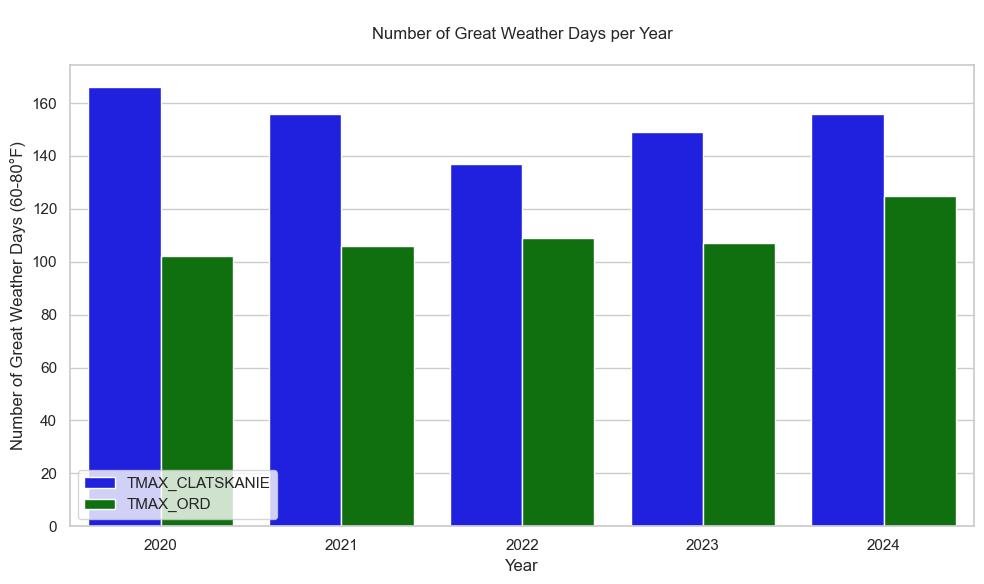

In [29]:
# Prepare data for seaborn barplot
great_days_long = great_days.melt(id_vars='year', value_vars=[df.columns[3], df.columns[9]],
                                 var_name='Station', value_name='Great Weather Days')

plt.figure(figsize=(10, 6))
sns.barplot(data=great_days_long, x='year', y='Great Weather Days', hue='Station', palette=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Number of Great Weather Days (60-80°F)')
plt.title('\nNumber of Great Weather Days per Year\n')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

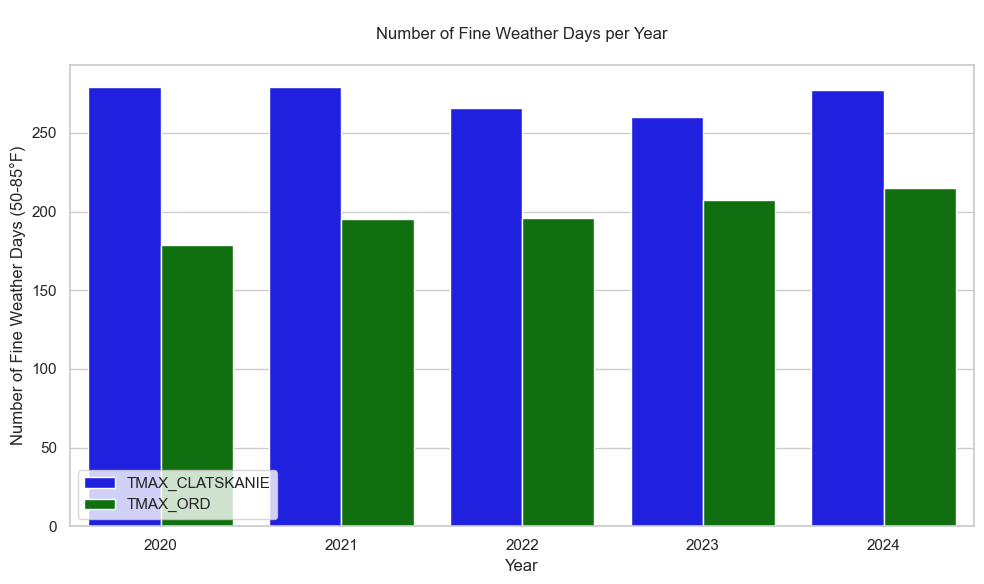

In [137]:
# Prepare data for seaborn barplot
fine_days_long = fine_days.melt(id_vars='year', value_vars=[df.columns[3], df.columns[9]],
                                 var_name='Station', value_name='Fine Weather Days')

plt.figure(figsize=(10, 6))
sns.barplot(data=fine_days_long, x='year', y='Fine Weather Days', hue='Station', palette=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Number of Fine Weather Days (50-85°F)')
plt.title('\nNumber of Fine Weather Days per Year\n')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

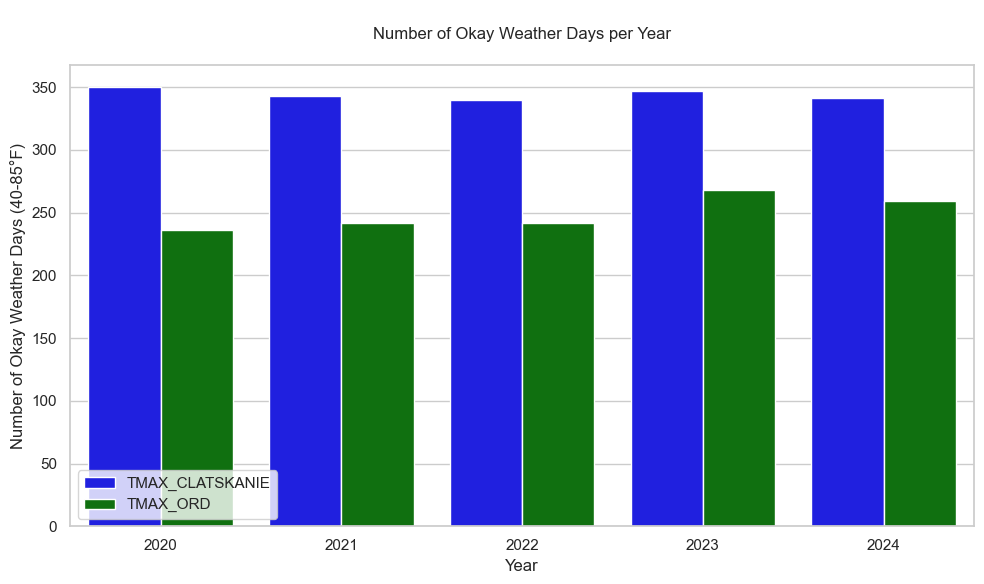

In [30]:
# create the same seaborn plot for okay_days
okay_days_long = okay_days.melt(id_vars='year', value_vars=[df.columns[3], df.columns[9]],
                               var_name='Station', value_name='Okay Weather Days')

plt.figure(figsize=(10, 6))
sns.barplot(data=okay_days_long, x='year', y='Okay Weather Days', hue='Station', palette=['blue', 'green'])
plt.xlabel('Year')
plt.ylabel('Number of Okay Weather Days (40-85°F)')
plt.title('\nNumber of Okay Weather Days per Year\n')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
# 